In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from termcolor import colored

from PIL import Image
from cv2 import resize
import cv2

In [2]:
train = pd.read_csv('/home/mckc/image class//train.csv')
test = pd.read_csv('/home/mckc/image class//test.csv')

print 'the training data shape is ',train.shape
print 'the test data shape is ', test.shape
train_records = train.shape[0]
test_records = test.shape[0]
    
X_tr = np.zeros((1,3,224,224),dtype=np.uint8)
Y_tr =[]
iteration = 0
for i in train.values[:,0]:
    image = resize(np.array(Image.open(i)),(224,224)).astype(np.float32)
    image[:,:,0] -= 103.939
    image[:,:,1] -= 116.779
    image[:,:,2] -= 123.68
    image = image.transpose((2,0,1))
    X_tr =  np.vstack((X_tr,np.expand_dims(image, axis=0)))
    Y_tr = np.append(Y_tr,train.values[iteration,1])
    iteration+=1
    if iteration % 50==0:
        print colored((float(iteration)/train_records*100 ,' Percentage complete'), 'green')
    

X_tr = X_tr[1:,:,:]
                
iteration = 0      
X_ts = np.zeros((1,3,224,224),dtype=np.uint8)
Y_ts = []
for i in test.values[:,0]:
    image = resize(np.array(Image.open(i)),(224,224)).astype(np.float32)
    image[:,:,0] -= 103.939
    image[:,:,1] -= 116.779
    image[:,:,2] -= 123.68
    image = image.transpose((2,0,1))
    X_ts =  np.vstack((X_ts,np.expand_dims(image, axis=0)))
    Y_ts = np.append(Y_ts,test.values[iteration,1])
    iteration+=1
    if iteration % 50==0:
        print colored((float(iteration)/test_records*100 ,' Percentage complete'), 'green')
    
X_ts = X_ts[1:,:,:]
print 'the training file shape',X_tr.shape,Y_tr.shape
print 'the testing file shape',X_ts.shape,Y_ts.shape

the training data shape is  (113, 2)
the test data shape is  (38, 2)
(44.24778761061947, ' Percentage complete')
(88.49557522123894, ' Percentage complete')
the training file shape (113, 3, 224, 224) (113,)
the testing file shape (38, 3, 224, 224) (38,)


In [3]:
def simulate(X,Y):
    import scipy as sp
    import scipy.ndimage
    complete = np.zeros((1,3,224,224),dtype=np.uint8)
    Y_complete = []
    for i in range(len(X)):
        complete = np.vstack((complete,X[i,:,:,:].reshape(-1,3,224,224)))
        complete = np.vstack((complete,scipy.ndimage.rotate(X[i,:,:,:], angle = 5,reshape=False,cval=1).reshape(-1,3,224,224)))
        complete = np.vstack((complete,scipy.ndimage.rotate(X[i,:,:,:], angle = 10,reshape=False,cval=1).reshape(-1,3,224,224)))
        complete = np.vstack((complete,scipy.ndimage.rotate(X[i,:,:,:], angle = 15,reshape=False,cval=1).reshape(-1,3,224,224)))
        complete = np.vstack((complete,scipy.ndimage.rotate(X[i,:,:,:], angle = -5,reshape=False,cval=1).reshape(-1,3,224,224)))
        complete = np.vstack((complete,scipy.ndimage.rotate(X[i,:,:,:], angle = -15,reshape=False,cval=1).reshape(-1,3,224,224)))
        complete = np.vstack((complete,scipy.ndimage.rotate(X[i,:,:,:], angle = -10,reshape=False,cval=1).reshape(-1,3,224,224)))
        rotated = np.fliplr(X[i,:,:,:])
        complete = np.vstack((complete,scipy.ndimage.rotate(rotated, angle = 5,reshape=False,cval=1).reshape(-1,3,224,224)))
        complete = np.vstack((complete,scipy.ndimage.rotate(rotated, angle = 10,reshape=False,cval=1).reshape(-1,3,224,224)))
        complete = np.vstack((complete,scipy.ndimage.rotate(rotated, angle = 15,reshape=False,cval=1).reshape(-1,3,224,224)))
        complete = np.vstack((complete,scipy.ndimage.rotate(rotated, angle = -5,reshape=False,cval=1).reshape(-1,3,224,224)))
        complete = np.vstack((complete,scipy.ndimage.rotate(rotated, angle = -10,reshape=False,cval=1).reshape(-1,3,224,224)))
        complete = np.vstack((complete,scipy.ndimage.rotate(rotated, angle = -15,reshape=False,cval=1).reshape(-1,3,224,224)))
        complete = np.vstack((complete,rotated.reshape(-1,3,224,224)))
        Y_complete = np.append(Y_complete,([Y[i]]*14))
        if i % 10==0:
            print colored((float(i)/len(X)*100 ,' Percentage complete'),'green')
    complete = complete[1:,:,:]
    return complete,Y_complete

In [4]:
import time
start_time = time.clock()
X,Y = simulate(X_tr,Y_tr)
print X.shape,Y.shape
print time.clock() - start_time, "seconds"

(0.0, ' Percentage complete')
(8.849557522123893, ' Percentage complete')
(17.699115044247787, ' Percentage complete')
(26.548672566371685, ' Percentage complete')
(35.39823008849557, ' Percentage complete')
(44.24778761061947, ' Percentage complete')
(53.09734513274337, ' Percentage complete')
(61.94690265486725, ' Percentage complete')
(70.79646017699115, ' Percentage complete')
(79.64601769911505, ' Percentage complete')
(88.49557522123894, ' Percentage complete')
(97.34513274336283, ' Percentage complete')
(1582, 3, 224, 224) (1582,)
117.947793 seconds


In [5]:
#from keras.datasets import cifar10
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
#(X_train, y_train), (X_test, y_test) = cifar10.load_data()
def standard(X):
    return (X - X.mean())/X.max()

#X_ts = standard(X_ts)
#X= standard(X)

map, Y_number = np.unique(Y, return_inverse=True)
Y_test_number = np.unique(Y_ts, return_inverse=True)[1]

Y_train = np_utils.to_categorical(Y_number, 2)
Y_test = np_utils.to_categorical(Y_test_number, 2)

datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    )

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(X_tr.astype(np.float32))

Using Theano backend.
Using gpu device 0: Quadro M2000M (CNMeM is enabled with initial size: 95.0% of memory, cuDNN 5005)


In [6]:
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD,RMSprop,Adadelta,Adagrad

def VGG_16(weights_path=None):
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(3,224,224)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1000, activation='softmax'))

    if weights_path:
        model.load_weights(weights_path)
        

    return model

model = VGG_16('/home/mckc/Downloads/vgg16_weights.h5')
lables = np.load('/home/mckc/labels.npy')
#model = VGG_16('/home/mckc/Face_code/face.h5')

model.layers.pop()
model.add(Dense(2, activation='softmax'))

adagrad = Adagrad(lr=0.001, epsilon=1e-08)
model.compile(optimizer=adagrad, loss='categorical_crossentropy',metrics=['accuracy'])

im = cv2.resize(cv2.imread('/home/mckc/cat.jpg'), (224, 224)).astype(np.float32)
im[:,:,0] -= 103.939
im[:,:,1] -= 116.779
im[:,:,2] -= 123.68
im = im.transpose((2,0,1))
im = np.expand_dims(im, axis=0)
out = model.predict(im)
print np.argmax(out)
im = im[0,:,:,:].transpose(1,2,0)
im[:,:,0] += 103.939
im[:,:,1] += 116.779
im[:,:,2] += 123.68
plt.imshow(im.astype(np.uint8))
print lables[np.argmax(out)]

im = cv2.resize(cv2.imread('/home/mckc/dog.jpg'), (224, 224)).astype(np.float32)
im[:,:,0] -= 103.939
im[:,:,1] -= 116.779
im[:,:,2] -= 123.68
im = im.transpose((2,0,1))
im = np.expand_dims(im, axis=0)
out = model.predict(im)
print np.argmax(out)
im = im[0,:,:,:].transpose(1,2,0)
im[:,:,0] += 103.939
im[:,:,1] += 116.779
im[:,:,2] += 123.68
plt.imshow(im.astype(np.uint8))
print lables[np.argmax(out)]

In [7]:
model.fit(X,Y_train,verbose=1,validation_data=(X_ts,Y_test),nb_epoch=100,batch_size=3)

Train on 1582 samples, validate on 38 samples
Epoch 1/100
1582/1582 [==============================] - 271s - loss: 0.6829 - acc: 0.6795 - val_loss: 0.6775 - val_acc: 0.6842
Epoch 2/100
1582/1582 [==============================] - 271s - loss: 0.6747 - acc: 0.6814 - val_loss: 0.6716 - val_acc: 0.6842
Epoch 3/100
1582/1582 [==============================] - 271s - loss: 0.6699 - acc: 0.6814 - val_loss: 0.6675 - val_acc: 0.6842
Epoch 4/100
1582/1582 [==============================] - 271s - loss: 0.6664 - acc: 0.6814 - val_loss: 0.6644 - val_acc: 0.6842
Epoch 5/100
1582/1582 [==============================] - 271s - loss: 0.6636 - acc: 0.6814 - val_loss: 0.6617 - val_acc: 0.6842
Epoch 6/100
1582/1582 [==============================] - 271s - loss: 0.6612 - acc: 0.6814 - val_loss: 0.6595 - val_acc: 0.6842
Epoch 7/100
1582/1582 [==============================] - 271s - loss: 0.6592 - acc: 0.6814 - val_loss: 0.6576 - val_acc: 0.6842
Epoch 8/100
1582/1582 [==============================] - 2

In [2]:
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD,RMSprop,Adadelta,Adagrad

def VGG_16(weights_path=None):
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(3,224,224)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1000, activation='softmax'))

    if weights_path:
        model.load_weights(weights_path)

    return model

#model = VGG_16('/home/mckc/Downloads/vgg16_weights.h5')
model = VGG_16('/home/mckc/Face_code/face.h5')

#model.layers.pop()
#model.add(Dense(2, activation='softmax'))

adagrad = Adagrad(lr=0.001, epsilon=1e-08)
model.compile(optimizer=adagrad, loss='categorical_crossentropy',metrics=['accuracy'])

Using Theano backend.
Using gpu device 0: Quadro M2000M (CNMeM is enabled with initial size: 95.0% of memory, cuDNN 5005)


396
Clark_Duke


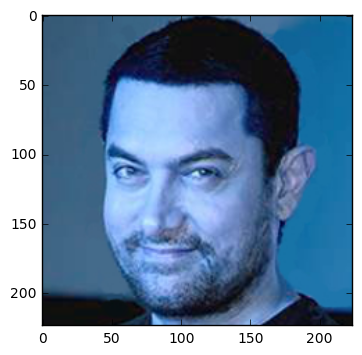

In [3]:
im = cv2.resize(cv2.imread('/home/mckc/Downloads/vgg_face_caffe/ak.png'), (224, 224)).astype(np.float32)
im[:,:,0] -= 103.939
im[:,:,1] -= 116.779
im[:,:,2] -= 123.68
im = im.transpose((2,0,1))
im = np.expand_dims(im, axis=0)
out = model.predict(im)
print np.argmax(out)
labels = np.loadtxt('/home/mckc/Downloads/vgg_face_caffe/names.txt', str, delimiter='\t')

im = im[0,:,:,:].transpose(1,2,0)
im[:,:,0] += 103.939
im[:,:,1] += 116.779
im[:,:,2] += 123.68
plt.imshow(im.astype(np.uint8))
print labels[np.argmax(out)]

In [10]:
model.fit(X,Y_train,verbose=1,validation_data=(X_ts,Y_test),nb_epoch=150,batch_size=5)

Train on 1582 samples, validate on 38 samples
Epoch 1/150
1582/1582 [==============================] - 249s - loss: 0.6307 - acc: 0.6814 - val_loss: 0.6292 - val_acc: 0.6842
Epoch 2/150
1582/1582 [==============================] - 249s - loss: 0.6307 - acc: 0.6814 - val_loss: 0.6291 - val_acc: 0.6842
Epoch 3/150
1582/1582 [==============================] - 249s - loss: 0.6306 - acc: 0.6814 - val_loss: 0.6290 - val_acc: 0.6842
Epoch 4/150
1582/1582 [==============================] - 249s - loss: 0.6305 - acc: 0.6814 - val_loss: 0.6290 - val_acc: 0.6842
Epoch 5/150
1582/1582 [==============================] - 249s - loss: 0.6305 - acc: 0.6814 - val_loss: 0.6289 - val_acc: 0.6842
Epoch 6/150
1582/1582 [==============================] - 249s - loss: 0.6304 - acc: 0.6814 - val_loss: 0.6288 - val_acc: 0.6842
Epoch 7/150
1582/1582 [==============================] - 249s - loss: 0.6303 - acc: 0.6814 - val_loss: 0.6287 - val_acc: 0.6842
Epoch 8/150
1582/1582 [==============================] - 2

KeyboardInterrupt: 

In [ ]:
# fits the model on batches with real-time data augmentation:
model.fit_generator(datagen.flow(X, Y_train, batch_size=2),validation_data=(X_ts.astype(np.float16),Y_test)
                    ,nb_worker=7,samples_per_epoch=len(X), nb_epoch=1000, pickle_safe=True)

Epoch 1/1000
 262/1582 [===>..........................] - ETA: 304s - loss: 0.6727 - acc: 0.6603

In [4]:
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
import cv2, numpy as np

def VGG_19(weights_path=None):
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(3,224,224)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1000, activation='softmax'))

    if weights_path:
        model.load_weights(weights_path)

    return model


model = VGG_19('/home/mckc/Downloads/vgg19_weights.h5')

model.layers.pop()
model.add(Dense(2, activation='softmax'))

sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='categorical_crossentropy')

In [5]:
model.fit(X_tr.astype(np.float16),Y_train,verbose=1,validation_data=(X_ts.astype(np.float16),Y_test),nb_epoch=5000,batch_size=5)

Train on 121 samples, validate on 40 samples
Epoch 1/5000
121/121 [==============================] - 24s - loss: 0.6877 - val_loss: 0.6791
Epoch 2/5000
121/121 [==============================] - 24s - loss: 0.6702 - val_loss: 0.6597
Epoch 3/5000
121/121 [==============================] - 24s - loss: 0.6536 - val_loss: 0.6429
Epoch 4/5000
121/121 [==============================] - 25s - loss: 0.6404 - val_loss: 0.6324
Epoch 5/5000
121/121 [==============================] - 25s - loss: 0.6307 - val_loss: 0.6240
Epoch 6/5000
121/121 [==============================] - 25s - loss: 0.6245 - val_loss: 0.6186
Epoch 7/5000
121/121 [==============================] - 25s - loss: 0.6214 - val_loss: 0.6168
Epoch 8/5000
121/121 [==============================] - 25s - loss: 0.6200 - val_loss: 0.6155
Epoch 9/5000
121/121 [==============================] - 25s - loss: 0.6180 - val_loss: 0.6135
Epoch 10/5000
121/121 [==============================] - 25s - loss: 0.6118 - val_loss: 0.6123
Epoch 11/5000


KeyboardInterrupt: 

In [ ]:
# fits the model on batches with real-time data augmentation:
model.fit_generator(datagen.flow(X_tr, Y_train, batch_size=10),validation_data=(X_ts.astype(np.float16),Y_test)
                    ,nb_worker=7,samples_per_epoch=len(X_tr), nb_epoch=5000, pickle_safe=True)

In [1]:
from keras.optimizers import SGD
from keras.models import Model
from keras.layers import Dense, Input, Activation
from convnetskeras. convnets import convnet

alexnet = convnet('alexnet', weights_path='/home/mckc/Downloads/alexnet_weights.h5')

input = alexnet.input
img_representation = alexnet.get_layer("dense_2").output

classifier = Dense(7,name='classifier')(img_representation)
classifier = Activation("softmax", name="softmax")(classifier)
model = Model(input=input,output=classifier)
sgd = SGD(lr=.001, decay=1.e-6, momentum=0.9, nesterov=False)
model.compile(optimizer=sgd, loss='categorical_crossentropy',metrics=["accuracy"])

Using Theano backend.
Using gpu device 0: Quadro M2000M (CNMeM is enabled with initial size: 95.0% of memory, cuDNN 5005)


In [16]:
model = Alexnet()

Start training with Alexnet CNN :


In [17]:
model.load_weights('/home/mckc/Downloads/alexnet_weights.h5')

Exception: You are trying to load a weight file containing 11 layers into a model with 8 layers.